<a href="https://colab.research.google.com/github/daisychenkeyu/UTS_ML2019_ID13261021/blob/master/Copy_of_ML_A1_ID13261021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Draft and Experiment Area

1. First impression
    * What is my chosen paper to read?
    * What type of the main contribution the paper has made?
        - A theory or proposition (revealing something, from unknown to known)
        - A method or algorithm (inventing a technique, from undoable to doable)

    * _Before_ reading the main body of the paper, write down your first impression  obtained from its abstract and short introduction.
    * Why does the paper attract you, such as, How it surprised you? Why do you think it addresses an important topic that will be helpful in your future study of machine learning?
    
2. Read the paper abstract and introduction, list here all the notions that you don't know the precise meaning. If you think you have completed your list,  compare the list with people around you who have chosen the same or a similar paper.

3. (During the next 7 days) Re-consider the central problem of the paper.

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
# Importing MNIST database

Using TensorFlow backend.


In [2]:
(x_trn,y_trn), (x_tst, y_tst) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
import tensorflow as tf
(x_trn, y_trn), (x_tst, y_tst) = tf.keras.datasets.mnist.load_data()

3


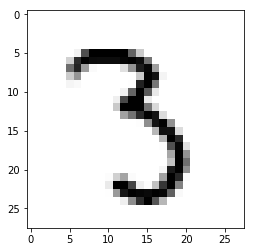

In [4]:
import matplotlib.pyplot as plt
image_idx = 8888
print(y_trn[image_idx]) # The label is 3
plt.imshow(x_trn[image_idx], cmap='Greys')

In [5]:
x_trn.shape
# size of traning data

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_trn = x_trn.reshape(x_trn.shape[0], 28, 28, 1)
x_tst = x_tst.reshape(x_tst.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# converting the values to float so we could get decimal points after division
x_trn = x_trn.astype('float16')
x_tst = x_tst.astype('float16')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_trn /= 255
x_tst /= 255
print('x_train shape:', x_trn.shape)
print('No. of images in training set x', x_trn.shape[0])
print('No. of images in testing set x', x_tst.shape[0])

x_train shape: (60000, 28, 28, 1)
No. of images in training set x 60000
No. of images in testing set x 10000


In [7]:

# Importing the required Keras modules which contain model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Defining a Sequential Model
model = Sequential()
# Adding layers
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays so it suits fully connected layers
model.add(Dense(126, activation=tf.nn.relu))
model.add(Dropout(0.25))
model.add(Dense(10,activation=tf.nn.softmax))

W0828 10:54:57.344187 139968243464064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 10:54:57.389922 139968243464064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 10:54:57.397361 139968243464064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 10:54:57.440683 139968243464064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0828 10:54:57.470653 139968243464064 deprecation_wrapp

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_trn,y=y_trn, epochs=16)

W0828 10:55:01.430566 139968243464064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 10:55:01.464484 139968243464064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0828 10:55:01.586197 139968243464064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/16
60000/60000 [==============================] - 40s 663us/step - loss: 0.2104 - acc: 0.9359
Epoch 2/16
60000/60000 [==============================] - 39s 650us/step - loss: 0.0880 - acc: 0.9724
Epoch 3/16
60000/60000 [==============================] - 39s 656us/step - loss: 0.0618 - acc: 0.9803
Epoch 4/16
60000/60000 [==============================] - 40s 659us/step - loss: 0.0481 - acc: 0.9843
Epoch 5/16
60000/60000 [==============================] - 39s 654us/step - loss: 0.0383 - acc: 0.9877
Epoch 6/16
60000/60000 [==============================] - 39s 647us/step - loss: 0.0319 - acc: 0.9894
Epoch 7/16
60000/60000 [==============================] - 39s 649us/step - loss: 0.0287 - acc: 0.9901
Epoch 8/16
60000/60000 [==============================] - 39s 646us/step - loss: 0.0251 - acc: 0.9911
Epoch 9/16
60000/60000 [==============================] - 39s 658us/step - loss: 0.0234 - acc: 0.9919
Epoch 10/16
60000/60000 [==============================] - 40s 659us/step - loss: 

In [9]:
model.evaluate(x_tst, y_tst)
# in this case we have achieved 98.7% accuracy

10000/10000 [==============================] - 2s 180us/step


[0.06494272996844538, 0.9866]

# Review Report on "Gradient-Based Learning Applied to Document Recognition"

In [0]:
# link to Github
https://github.com/daisychenkeyu/UTS_ML2019_ID13261021/blob/master/Copy_of_ML_A1_ID13261021.ipynb

## Introduction

Machine learning has played a critical role in completing automation tasks including data predictions, fraud detections, and pattern recognition. The rapid evolution in machine learning has led to an increase in subsequent use cases demand. Many methods and algorithms have been developed, they have been historically recognized and applied in machine learning projects. The following report will review and critique the academic article “Gradient-Based Learning Applied to Document Recognition” by Yann LeCun, Léon Botton, Yoshua Bengio, and Patrick Haffner which conveys that automatic learning can be applied in building pattern recognition systems more efficiently. The following report will describe the concept of the paper, the idea of the problem-solving technique. Followed by an in-depth elaboration of the main methods introduced in the paper. The methodology of experiments and the accuracy and quality of the work will be demonstrated, the domain of the research and wider comparisons with current technologies will be further discussed. The last part of the report will focus on the flow and presentation quality of the paper.

## Content

The paper has introduced a novel approach to the application of gradient-based Convolutional Neural Networks trained with the backpropagation algorithm, and the Graph Transformer Networks learning paradigm in handwriting and digital recognition. The methods described in this paper offer sufficient solutions to several problems encountered in traditional pattern recognition systems.

Multi-heterogeneous modules, which implements ‘forward propagation’ methods, are discovered to recognize words without being given the factual segmentation, the paper analyzes the backpropagation algorithm which carries the same arguments in forward-propagation and seizes them to calculate the derivatives in reserve order. It is exemplified that the pattern recognition paradigms with gradient-based learning allow non-differentiable modules to be trained in a multi-model system without adverse impacts, which resolves the problem of unreliable human assumptions in traditional feature extraction.

It is elaborated that gradient-based learning methods with Global Transformer Networks efficiently take several graphs input into a multi-modules system and produce output, important errors are focused using backpropagation to integrate the ambiguities from the segmentation algorithm with ambiguities of the uncertainties of the character recognizer. By globally training multi-module systems, the inefficiency of hand truthing images to acquire segmented characters for training a character-level recognizer is resolved, which also achieves better recognition performance. GTN-based handwriting recognizers at the string-level are trained with four gradient-bsed methods without requiring manual segmentation and labeling are described: Viterbi Training, discriminative Viterbi training, forward training, and discriminative forward-training.

While Heuristic Over-segmentation is defined as representative word segmentation and recognition method, an alternative method called Space Displacement Neural Network for multiple object recognition is described to compass a recognizer at all possible positions across a normalized image of the entire word or string, which eliminates the process of segmentation.

The paper further interprets the concept of globally trained GTNs articulates the GTN-based method in the context of Generalized Transduction, Graph Composition algorithm, online handwriting systems and check reading systems. Hidden Markou Models, which reveals the probabilities of sequences of random variables, are considered as an extension of GTN to combine in multiple models and determine output graphs. By experimenting with SDNN/HMM hybrids and Over-segmentation system within a 25461-word dictionary, the comparative results show the adequacy of globally trained HMM/SDNN hybrids for handwriting recognition, which can be further applied to build a check amount reading system that manages both personal and business checks.

## Innovation

**The paper has introduced and described advanced methods and algorithms:**

•	Convolutional Neural Network (CNN)

•	Feedforward neural network

•	Forward Propagation

•	Gradient Backpropagation

•	Graph Transformer

•	Graph Transformer Network (GTN)

•	Hidden Markov Model (HMM)

•	Heuristic Over-Segmentation (KOS)

•	K-nearest Neighbor (KNN)

•	Optical Character Recognition (OCR)

•	Principal Component Analysis (PCA)

•	Radial Basis Function (RBF)

•	Support Vector Machine (SVM)

•	Space Displacement Neural Network (SDNN)


This section will focus on three algorithms/models that contribute the most to the research including Gradient backpropagation, Convolutional Neural Network, and Global Transformer Network.

**Gradient-Based Learning and Backpropagation**

The idea of the gradient descent algorithm is to minimize a certain function by iteratively proceeding in the direction of the steepest slope, which is defined as the negative of the gradient. This underlies how neural networks work (3Blue1Brown, 07:32).Conceptually, each neuron is connected to all the neurons contained the previous layer, the weights in the weighted sum defining its activation can be considered as the strengths of the connection. The biases determine whether the neuron is active (3Blue1Brown, 09:16). By having a Cost Function, the error for a single training example can be computed by adjusting the values of the parameters (biases and weights).By applying gradient descent, the local minimum of the Cost Function is converged, and hence the Cost Function is minimized to achieve better performance on all samples.


In [0]:
!unzip Equation.zip

Archive:  Equation.zip
  inflating: Equation.png            
   creating: __MACOSX/
  inflating: __MACOSX/._Equation.png  


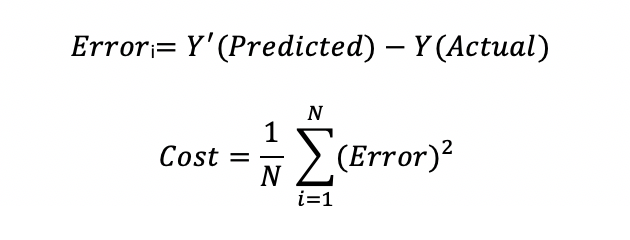

In [0]:
from IPython.display import Image
Image('Equation.png')
# Cost Function equation

By implementing backpropagation, the gradients can be computed backward from the output to the input. Adjustments are made to weights, biases and activation from the previous layer to produce the desired output in the output layer. By adding together all the desired effects, a list of nudges on weights and biases of every single sample on the second to last layer can be obtained. The same process is applied to the relevant weights and biases recursively, and eventually moving backward. The relative proportion to these changes lead to the most rapid decrease to the cost is also determined by applying backpropagation (3Blue1Brown, 10:40). The desired changes on each layer are then averaged over all training data, which refers back to the negative gradient function. 

**LeNet-5 Convolutional Neural Network**

The architecture of LeNet-5 is explained in detail in this paper. LeNet-5 Convolutional Neural Network in early-stage consists of 7 layers that all contain trainable weights. The first layer is made up of a convolutional layer with six feature maps connected to a 5x5 neighborhood in the input respectively, which changes the input dimensions0 from 32x32 to 28x28. The second layer consists of a sub-sampling layer with a 2x2 neighborhood in the corresponding feature map in the first layer. From there, the second layer adds the inputs, multiply with a trainable weight and then add a bias. The results are then placed to an activation function (Relu/Sigmoid etc). The dimensions of the resulting image will then be reduced (Tsang, 2018). 


In [0]:
!unzip Equation2.zip

Archive:  Equation2.zip
  inflating: Equation2.png           
  inflating: __MACOSX/._Equation2.png  


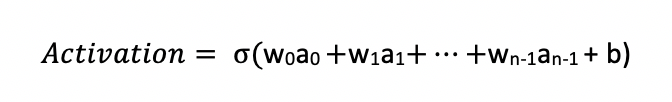

In [0]:
from IPython.display import Image
Image('Equation2.png')
# Activation Function equation

The third layer is made up of a convolutional layer with 16 feature maps connected to 5x5 neighborhoods. To break the symmetry in the network and keeps the number of connections within proper bounds, only 10 feature maps are associated to the feature maps of the second layer, hence the number of connections is also reduced. The fourth layer is almost the same as the second layer, except it consists of 16 feature maps. The fifth layer is another convolutional layer within 120 feature maps connected to a 5x5 neighborhood respectively. The sixth layer is fully connected to the fifth layer with 84 units. Lastly, the output layer produces the outputs of each Euclidean Radial Basis Function units. The gradient of the loss function corresponding to the weights in all the layers is calculated through backpropagation.

In [0]:
!unzip CNN.zip

Archive:  CNN.zip
  inflating: CNN.png                 
  inflating: __MACOSX/._CNN.png      


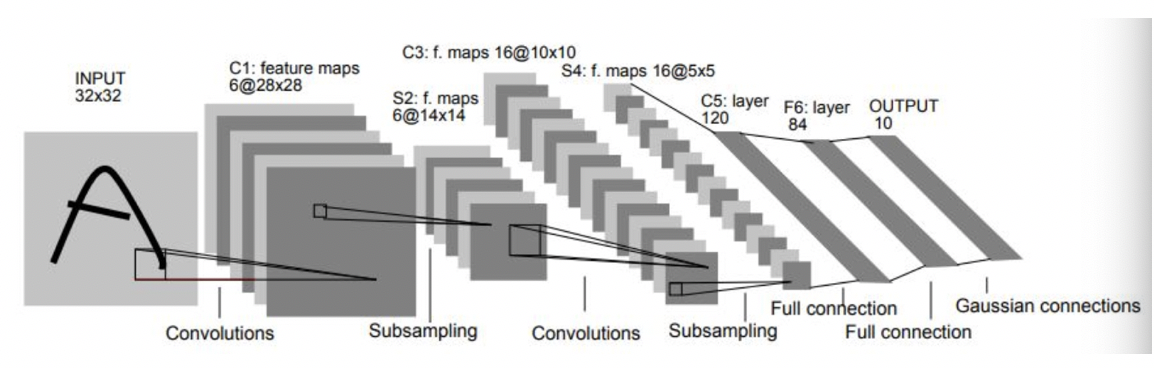

In [0]:
from IPython.display import Image
Image('CNN.png')
# CNN architecture

**Graph Transformer Network**

The paper describes the concept of Graph Transformer Networks and how they effectively extend the applicability of gradient-based learning. The idea of Graph Transformer Networks is to take graphs as inputs and then deliver graphs as output. GTNs with global training systems are applied in many multiple object recognition methods including Viterbi Training, Discriminative Viterbi Training, Forward Training, and Discriminative Forward Training. Its robustness is applied to online handwriting recognition systems, check reading systems and other automatic learning domains.


## Technical quality

LeCun et al (1998) have experimented with handwritten samples from two different groups: SD-1 and SD-3. Samples in SD-3 were collected from Census Bureau employees though SD-1 was obtained from high school students. They then separated them into a training set and test set. During the process of data reprocessing, they took a subset of 10000 test images and made a full set of 60000 patterns for training and testing. Original images were size normalized into 3 versions: 28x28 pixel, 20x20 pixel, and 16x16 pixel images.  LeNet-5 was first trained with the first version of the database, iteration was made to the parameter learning rate. To further verify their observations, more training samples were artificially generated by distorting the initial database randomly. 

The same database was then trained with other high-performance classifiers including linear Classifier, Baseline Nearest Neighbor Classifier, Principal Component Analysis and Polynomial Classifier, One-Hidden Layer Fully Connected Multilayer Neural Network, Two-Hidden Layer Fully Connected Multilayer Neural Network, LeNet-1, LeNet-4, Boosted LeNet-4, Tangent Distance Classifier and Support Vector Machine (LeCun, 1998). 

Comparative results were evaluated. The results were compared in 5 factors: 1. Error Rate ie. accuracy, 2. Rejection Performance, 3. The numbers of multiply-accumulate operations required for the recognition of a single-sized image, 4. Memory requirement and 5. Training time. LeCun et al (1998) concluded that Boosted LeNet-4 achieves the highest accuracy with reasonable training time and memory requirement. An interesting finding of more training data results in high accuracy was also revealed.

In [0]:
!unzip Comp.zip

Archive:  Comp.zip
  inflating: Comp.png                
  inflating: __MACOSX/._Comp.png     


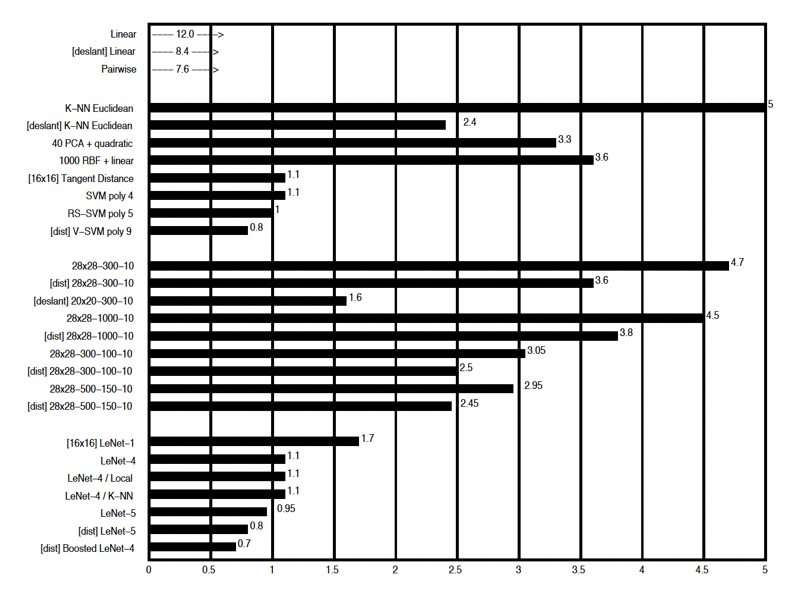

In [0]:
from IPython.display import Image
Image('Comp.png')
# Comparative Results of accuracy from other high-performance classifiers

While it is common that the level of performance will differ based on the particular situation when choosing the best classifier, the process needs to be carefully designed to avoid biases which lead to invalid conclusions. The paper describes the process of experimenting using a small/medium-size database, the same database is then trained with other classifiers to obtain comparative results. However, the preprocessing procedures were insufficiently explained. Although the original dataset was split into various versions, the conclusion would be more generalized if experimenting on different datasets.

One of the most common phenomena in machine learning states that the training error decreases while the test error increases after certain iterations when over-training occurs. This was not observed in the experiment. Possible reasons were clearly stated in the paper. However, the conclusion is controversial as the complexity of the data models used on this dataset is too high while the size of the training samples is fairly small. The models are too powerful to remember every training data and its output label, which leads to small training loss. The conclusion of more training data would improve accuracy is drawn too early as regularization is not applied to avoid overfitting.

To resolve the problem of insufficiency of training samples, LeCun et al (1998) implemented a random distortion method. This is an optimal approach when the data size is inadequate. However, it would be improved if the methodology of bootstrapping is further explained (Scheau, 2016).

## Application and X-factor

The idea of applying gradient-based learning using the backpropagation algorithm to build pattern recognition systems is remarkable and inspiring. Historically, automatic learning and pattern recognition systems have been investigated in the early 19 century. However, it was impractical to use traditional hand-crafted feature extraction due to the variability and complexity of the data. While the fundamentals of Neural Networks were first established in 1994, LeCun et al (1998) propelled the field in deep learning and proposed LeNet-5 which efficiently resolves the problems that traditional pattern recognition systems have encountered. This paper addresses how LeNet-5, together with GTNs can be further developed to overcome obstacles while applied to document recognition.

The work of LeCun et al (1998) was phenomenal, LeNet-5 played an important role in handwritten digit recognitions and check recognitions. However, this advanced algorithm was still in its incubation. In 2012, Krizhevsky et al (2012) proposed ImageNet classification, further developed Deep Convolutional Neural Networks. By utilizing non-saturating neurons and efficient GPU implementation, training speed was improved while the model itself was naturally complex. “Dropout” was employed as a regularization method to reduce overfitting. ImageNet was then named by AlexNet which has significant improvements over LeNet-5 and efficiently produces a lower error rate. ImageNet classification then became a benchmark for image recognition. Zeiler et al (2014) started with the architecture of Krizhevsky et al (2012) and discovered other features that outperformed results on ImageNet. By just retaining the SoftMax classifier on top, a supervised pre-training method was implemented, and the new model produces better results on object detections. Finally, the latest proposal by Szegedy et al (2018) of GoogLeNet which developed upon the Inception model and significantly outperforms current deep learning networks.
Convolutional Neural Networks have been successfully applied in pattern recognition tasks over the last 20 years, they are developed and trained to have more features to complete more complex recognition tasks including Facial Recognition, natural history collections for documenting the history of biodiversity, evolution, habitat loss and biological invasion, climate change analysis and personalized advertising. 


With the fast development and increasing power of Convolutional Neural Network, it has become one of the most dominant algorithms that can be applied to a various domain of applications. Yamashita et al (2018) have discovered the architecture of Convolutional Neural Network with backpropagation is critical to leverage its potential to improve radiologist performance and eventually, medical care.

## Presentation

The structure of the paper is clear, it is relatively easy to follow the flow and logic of the arguments. The abstract describes the relevant background of the topic, and briefly introduces the new algorithm. The domain of the research is then explained in-depth in the introduction, the state of the current technology is described, as well as the obstacles it is facing. The introduction also summarizes the main concepts of each section, therefore, to produce a logical flow. The conclusion gives a sense of closure while wrapping up the concepts and further improvements. 

This paper is highly technical and sophisticated, it requires background knowledge to fully understand the content. However, the terminologies and math equations are described in detail for viewers to gain a sense of understandings. While some background knowledge are not explained in-depth in the main content of the paper, the paper provides an Appendix to describe the terminologies and methods mentioned in every section. Graph presentations play a critical role in demonstrating concepts of models and hence help viewers to understand visually.

Each section in the paper contains a summary of the current section and the previous section, some sections are separated into sub-sections with reasonable titles. In this way, the arguments are logically presented, and it provides a clear structure for viewers to follow. The paper is constructed from the basis and the challenges, then methods are introduced to overcome the challenges. From there, appropriate experiments are then conducted to prove the theoretical concepts. In doing this, each argument is gradually elaborated and explained, which coherently develops the progress of the research.

## Reference

* 3Blue1Brown. 2017, *what is backpropagation really doing? | Deep Learning, Chapter 3*, Video Recording, Youtube, viewed 18 Aug 2019,
<https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=658s>



* 3Blue1Brown. 2017, *Gradient descent, how neural networks learn | Deep learning, chapter 2*, Video Recording, Youtube, viewed 18 Aug 2019,
<https://www.youtube.com/watch?v=IHZwWFHWa-w>



* Bottou, L., Bengio, Y & LeCun, Y. 1997, ‘Global Training of document processing systems using graph transformer networks’, *Proceedings of the IEEE Computer Society Conference on Computer Vision and Pattern Recognition*, pp, 489-494



* Culurciello, E, 2017. ‘The History of Neural Networks’, *Dataconomy*, 19 April, viewed 26 Aug 2019,

  < https://dataconomy.com/2017/04/history-neural-networks/>



* Jurafsky, D & Martin, J.H. 2018 ‘Hidden Markov Models’, *Speech and Language Processing*, Stanford, California, viewed 20 Aug 2019,

  < https://web.stanford.edu/~jurafsky/slp3/A.pdf>



* Krizhevsky, A., Sutskever, I. & Hinton, G.E. 2017, ‘ImageNet Classification with Deep Convolutional Neural Networks’, *Communication of the ACM*, Vol,60, no.6, pp, 84-90


* LeCun, Y., Bottou, L., Bengio, Y & Haffner, P. 1998, ‘Gradient-based learning applied to document recognition’, Proceedings of the IEEE, vol.86, no.11, pp. 2278-2324




* McGonagle, J., Shaikouski, G & Williams. 2019, Backpropagation, *Briliant.org*, viewed 20 Aug 2019, 

  < https://brilliant.org/wiki/backpropagation/>



* Saha, S. 2018, ‘A Comprehensive Guide to Convolutional Neural Networks – the ELI5 way’, *towardsdatascience*, 16 December, viewed 25 Aug 2019,

  < https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53>
 
 
 
 
* Salzberg, S.L 1999, ‘On comparing classifiers: A critique of Current Research and Methods’, *Data Mining and Knowledge Discovery*, vol.1, pp, 1-12
 
 
 
* Scheau, C. 2016, ‘Regularization in deep learning’, *Chatbotslife*, weblog, 16 November, viewed 23 Aug 2019,
 
    < https://chatbotslife.com/regularization-in-deep-learning-f649a45d6e0 >

 
* Szegedy, C., Liu, W., Jia, Yangqing., Sermanet, P., Reed, S., Anguelov, D., Erhan, D., Vanhoucke, V & Rabinovich, A. 2015, ‘Going Deeper with Convolutions’, *IEEE Conference on Computer Vision and Pattern Recognition. Proceedings*, pp, 1-9




* Tsang, S. 2018 ‘Reviewed: LeNet-1, LeNet-4, LeNet-5, Boosted LeNet-4 (Image Classification)’, *medium*, weblog, 8 Aug, viewed 23 Aus 2019,

     <https://medium.com/@sh.tsang/paper-brief-review-of-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-1f5f809dbf17>





* Yamashita, R., Nishio, M., Do, R.K.G, et al. 2018, ‘Convolutional Nueral Networks: an overview and application in radiology’, Insights Imaging, vol.9, p.611




* Zeiler, M & Fergus, R. 2013, ‘Visualizing and Understanding Convolutional Networks’, *Computer Vision and Pattern Recogition*, Cornell University, NY, viewed 24 Aug 2019, 

     < https://arxiv.org/abs/1311.2901>



